In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
base_dir=r"/content/drive/MyDrive/fish_classification_data"

In [ ]:
os.listdir(base_dir)

['Seacucumber',
 'OYSTERS',
 'Mussel',
 'CRABS',
 'starfish',
 'Finfish',
 'Lobster',
 'Shrimp']

In [ ]:
IMAGE_SIZE=224
BATCH_SIZE=64

In [ ]:
train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1
    )

test_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
     rescale=1./255,
     validation_split=0.1
)

train_datagen=train_datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='training'
)

validation_generator=test_datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='validation'
)

Found 2816 images belonging to 8 classes.
Found 309 images belonging to 8 classes.


In [ ]:
Data = tf.keras.utils.image_dataset_from_directory(base_dir)

Found 3125 files belonging to 8 classes.


In [ ]:
data_iterator = Data.as_numpy_iterator()

In [ ]:
data_iterator

In [ ]:
batch = data_iterator.next()

In [ ]:
batch=train_datagen.next()

In [ ]:
batch[0].shape

(64, 224, 224, 3)

In [ ]:
batch[1]

array([[0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 

/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


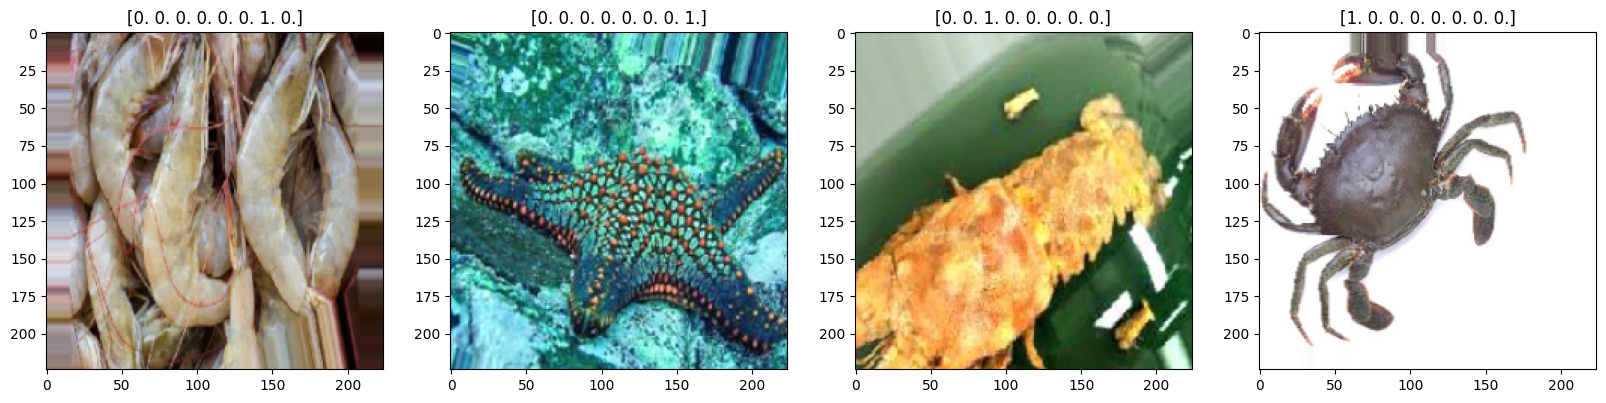

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
model = Sequential()

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(224, activation='relu'))
model.add(Dense(8, activation='softmax'))

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit_generator(train_datagen,
                    epochs=30,
                    validation_data = validation_generator)

Epoch 1/30
44/44 [==============================] - 825s 19s/step - loss: 1.9377 - accuracy: 0.2667 - val_loss: 1.6233 - val_accuracy: 0.3754
Epoch 2/30
44/44 [==============================] - 45s 1s/step - loss: 1.5027 - accuracy: 0.4258 - val_loss: 1.2901 - val_accuracy: 0.5243
Epoch 3/30
44/44 [==============================] - 45s 1s/step - loss: 1.2922 - accuracy: 0.5202 - val_loss: 1.1443 - val_accuracy: 0.5987
Epoch 4/30
44/44 [==============================] - 47s 1s/step - loss: 1.0487 - accuracy: 0.6246 - val_loss: 0.9127 - val_accuracy: 0.6796
Epoch 5/30
44/44 [==============================] - 45s 1s/step - loss: 0.8652 - accuracy: 0.6939 - val_loss: 0.8677 - val_accuracy: 0.7314
Epoch 6/30
44/44 [==============================] - 45s 1s/step - loss: 0.7216 - accuracy: 0.7543 - val_loss: 0.7728 - val_accuracy: 0.7735
Epoch 7/30
44/44 [==============================] - 45s 1s/step - loss: 0.6522 - accuracy: 0.7706 - val_loss: 0.7304 - val_accuracy: 0.7540
Epoch 8/30
44/44 [

In [ ]:
test_loss, test_acc = model.evaluate(test_datagen)
print('Test accuracy:', test_acc)

5/5 [==============================] - 1s 254ms/step - loss: 0.6053 - accuracy: 0.8900
Test accuracy: 0.8899676203727722


In [ ]:
x_test, y_test = test_datagen.next()

In [ ]:
y_pred = model.predict(x_test)

2/2 [==============================] - 1s 16ms/step


In [ ]:
y_pred_classes = np.argmax(y_pred, axis=1)

In [ ]:
y_test_classes = np.argmax(y_test, axis=1)

In [ ]:
print("True labels: ", y_test_classes[:10])
print("Predicted labels: ", y_pred_classes[:10])

True labels:  [1 5 5 1 5 1 6 5 3 1]
Predicted labels:  [1 5 5 1 5 1 6 5 3 3]


In [ ]:
class_labels = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
class_names = np.array(['CRABS',
 'Finfish',
 'Lobster',
 'Mussel',
 'OYSTERS',
 'Seacucumber',
 'Shrimp',
 'starfish'])

In [ ]:
def display_images(images, labels, predicted_labels):
    fig, axes = plt.subplots(2, 5, figsize=(10, 5))
    axes = axes.ravel()
    for i in np.arange(0, 10):
        axes[i].imshow(images[i], cmap='gray')
        axes[i].set_title("True: {}\nPredicted: {}".format(class_names[labels[i]], class_names[predicted_labels[i]]))
        axes[i].axis('off')

    plt.subplots_adjust(wspace=0.5)
    plt.show()

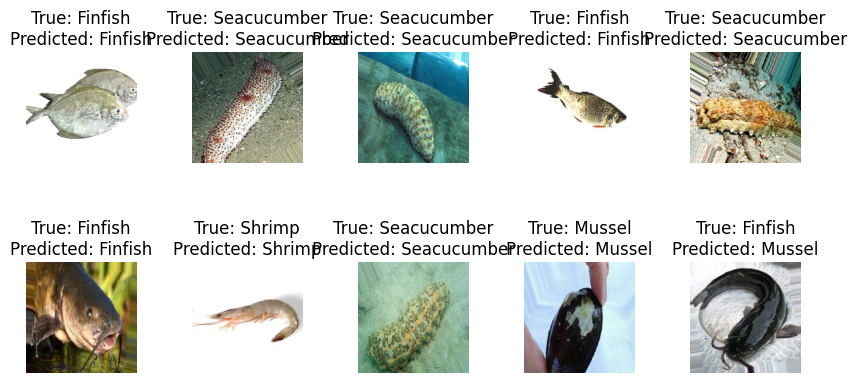

In [ ]:
display_images(x_test[:10], y_test_classes[:10], y_pred_classes[:10])